# 1. Предобработка


Выберите набор данных из списка в конце задания. Обработайте данные в нём:

1. Обработайте недостающие данные в датасете - удалить/заменить/etc, обоснуйте своё решение
1. Постройте как минимум по 1 графику каждого типа из представленных на лекции. Для каждого построенного графика объясните почему отображённые данные лучше всего представимы именно этим типом графика
1. Сохраните датасет


1. Создайте новую колонку, отображающую характеристику набора данных. Новая колонка должна обладать смысловой нагрузкой.

    Например, для набора данных о прямоугольниках с двумя колонками width и height будет корректно придумать колонку perimeter или area, равную width * height. Некорректно будет придумать колонку width2, равную width * 2, потому что эта информация не будет нести полезную информацию о фигурах

Не оценивается баллами, но даёт очки уважения:
1. Выдвиньте 2 гипотезы о данных. Например, для датасета codeforces достаточно интересной гипотезой может быть "простые задачи (рейтинг меньше 1500) почти всегда решаются больше 5000 раз"


Наборы данных:

1. [Spotify Tracks DB](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) - характеристики треков в spotify
1. [VKontakte Dataset of Users' Textual Data](https://www.kaggle.com/oldaandozerskaya/vkontakte-dataset-of-users-textual-data) 1. основная информация 10к профилей ВК
1. [Data Science for COVID-19](https://www.kaggle.com/kimjihoo/coronavirusdataset) - информация о распространении коронавируса в Южной Корее в 2020 году
1. [Dota 2 - Pro Players Matches Results 2019 ~ 2021](https://www.kaggle.com/devinanzelmo/dota-2-matches?select=player_ratings.csv) - информация матчей игроков DoTA 2. Если данные не влезают в память, можно воспользоваться [аналогом pandas](https://dask.org/) для обработки вне RAM
1. [GPS Data of Seabirds](https://www.kaggle.com/saurabhshahane/predicting-animal-behavior-using-gps) - данные о миграции птиц
1. [FAANG Historical Stock Price Data](https://www.kaggle.com/specter7/amazon-amzn-historical-stock-price-data) -  данные о биржевых котировках компаний FAANG c 2016 по 2021 год
1. [NBA 2k20 player dataset](https://www.kaggle.com/isaienkov/nba2k20-player-dataset) - информация об игроках NBA
1. [Anime dataset](https://www.kaggle.com/thunderz/anime-dataset?select=user_data.csv) - данные о просмотре аниме пользователями с сайта myAnimeList

## Подтягиваем данные

In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from scipy import interpolate

"""
'mal_id', 'aired_from', 'aired_to', 'duration', 'episodes', 'genres', 'popularity', 'premiered', 'rank', 'rating', 'score', 'scored_by', 'source', 'status', 'studios', 'synopsis', 'title', 'title_english', 'type'
"""
data = pd.read_csv("data/anime_data.csv")

## Находим недостающие данные

Удаляем все неполные колонки данных, в связи с их ненадобностью

In [2]:
print(data.isnull().sum())
data.dropna(subset=["aired_from"], inplace=True)
# deleting useless or not full data
data.drop(columns=["mal_id", "aired_to", "premiered", "rank", "synopsis", "status", "title_english"])

mal_id              0
aired_from          5
aired_to         5368
duration            0
episodes            0
genres              0
popularity          0
premiered        7880
rank             1282
rating              0
score               0
scored_by           0
source              0
status              0
studios             0
synopsis          237
title               0
title_english    5941
type                0
dtype: int64


,aired_from,duration,episodes,genres,popularity,rating,score,scored_by,source,studios,title,type
0,1998-04-03T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,R - 17+ (violence & profanity),8.79,544987,Original,"[{'mal_id': 14, 'name': 'Sunrise'}]",Cowboy Bebop,TV
1,2001-04-04T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,PG-13 - Teens 13 or older,7.21,23787,Manga,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]",Shin Shirayuki-hime Densetsu Prétear,TV
2,1978-03-14T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,PG-13 - Teens 13 or older,7.71,7059,Manga,"[{'mal_id': 18, 'name': 'Toei Animation'}]",Uchuu Kaizoku Captain Herlock,TV
3,2008-01-01T00:00:00+00:00,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,R+ - Mild Nudity,5.05,1181,Original,[],Kago Shintarou Anime Sakuhin Shuu,OVA
4,2007-03-31T00:00:00+00:00,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,G - All Ages,6.43,228,Unknown,"[{'mal_id': 455, 'name': 'Palm Studio'}]",Tetsujin 28-gou: Hakuchuu no Zangetsu,Movie
...,...,...,...,...,...,...,...,...,...,...,...,...
11330,1996-07-24T00:00:00+00:00,28 min per ep,3,"['Action', 'Comedy', 'Drama', 'Ecchi', 'Horror...",6053,R - 17+ (violence & profanity),6.45,2201,Unknown,"[{'mal_id': 10, 'name': 'Production I.G'}]",Blue Seed 2,OVA
11331,2011-09-24T00:00:00+00:00,55 min,1,"['Dementia', 'Drama']",8174,PG-13 - Teens 13 or older,6.10,491,Original,[],Midori-ko,Movie
11332,1981-08-23T00:00:00+00:00,1 hr 30 min,1,"['Kids', 'Adventure']",11291,G - All Ages,5.84,185,Unknown,[],Bremen 4: Jigoku no Naka no Tenshi-tachi,Special
11333,2011-04-07T00:00:00+00:00,25 min per ep,39,"['Historical', 'Samurai', 'Seinen']",3423,R - 17+ (violence & profanity),7.99,2608,Manga,"[{'mal_id': 5, 'name': 'Bee Train'}]",Hyouge Mono,TV


## Some useful data sets

In [3]:
ganers = [j.strip().lstrip("'").rstrip("'") for i in data.genres for j in i.lstrip("[").rstrip("]").split(",")]
ganres_set = set(j.strip().lstrip("'").rstrip("'") for i in data.genres for j in i.lstrip("[").rstrip("]").split(","))
ganres_set.remove("")
converted_date = pd.to_datetime(data.aired_from)

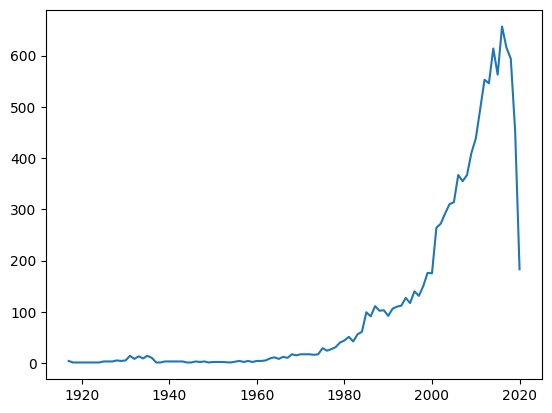

In [4]:
pd.value_counts(converted_date.dt.year).sort_index(ascending=True).plot()
plt.show()

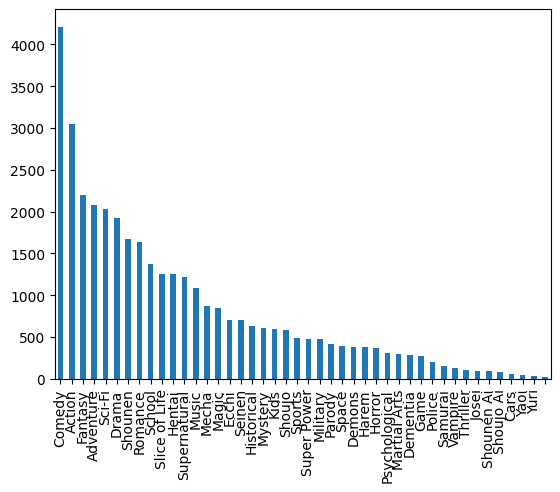

In [5]:
pd.value_counts(ganers).plot(kind="bar")
plt.show()

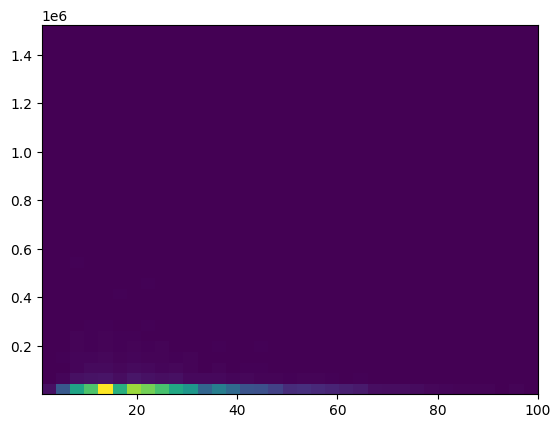

In [6]:
plt.hist2d(list(map(len, data.title)), data.scored_by, bins=35)
plt.show()

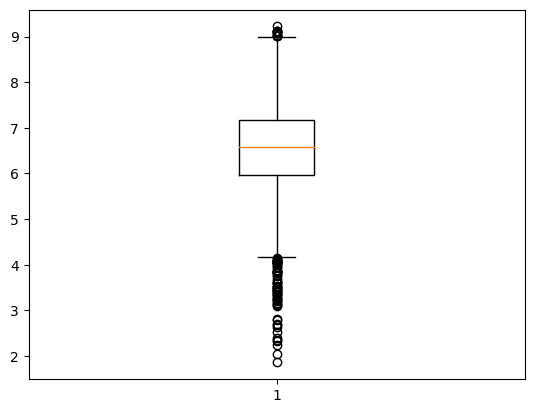

In [7]:
plt.boxplot(data.score)
plt.show()

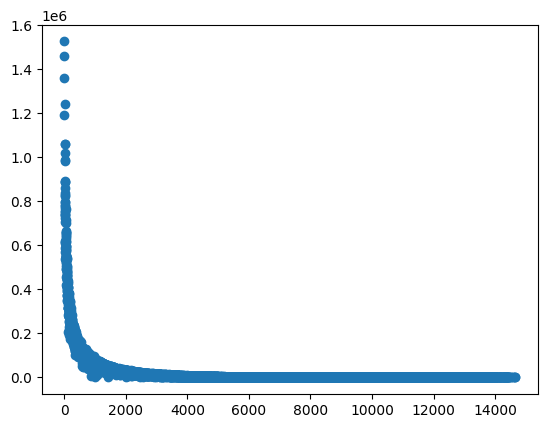

In [8]:
plt.scatter(data.popularity, data.scored_by)
plt.show()

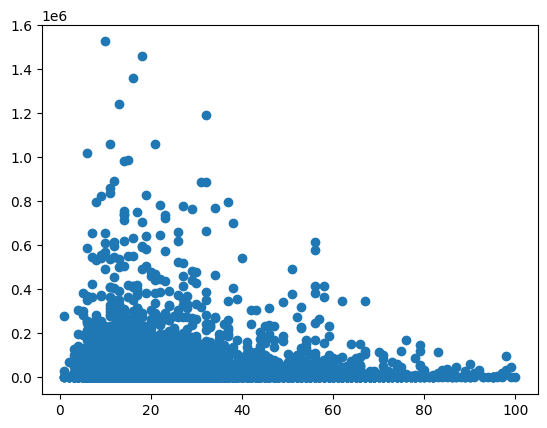

In [9]:
plt.scatter(list(map(len, data.title)), data.scored_by)
plt.show()

# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяции). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [10]:
def lagrange(X, Y):
    def li(x, xi):
        return reduce(lambda res, xs: res * ((x - xs) / (xi - xs)), [xs for xs in X if xs != xi], 1)

    def f(x):
        return sum(y * li(x, X[i]) for i, y in enumerate(Y))

    return f

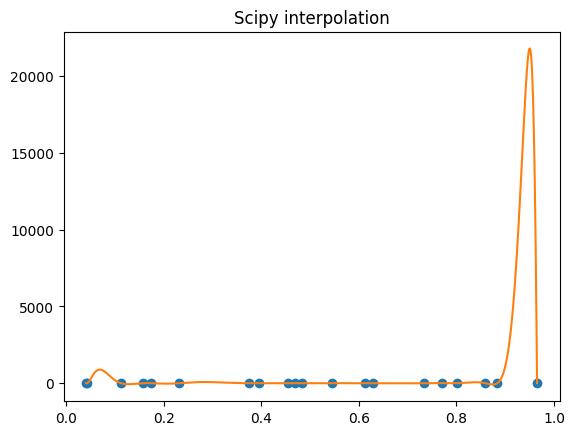

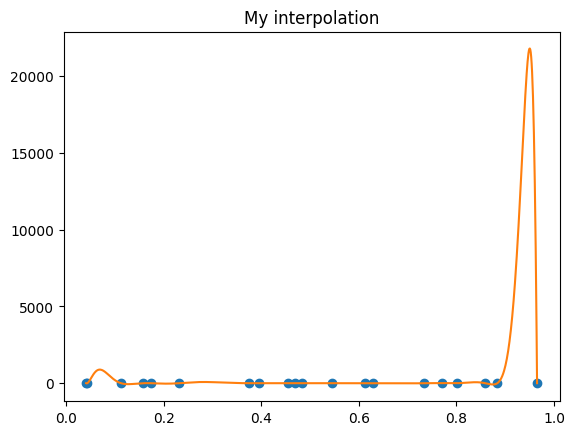

In [11]:
POINTS_NUM = 20
POINTS_XI, POINTS_YI = [random.random() for _ in range(POINTS_NUM)], [random.random() for _ in range(POINTS_NUM)]
lines = np.linspace(min(POINTS_XI), max(POINTS_XI), num=1000)

plt.plot(POINTS_XI, POINTS_YI, "o", lines, interpolate.lagrange(POINTS_XI, POINTS_YI)(lines))
plt.title("Scipy interpolation")
plt.show()

plt.plot(POINTS_XI, POINTS_XI, "o", lines, lagrange(POINTS_XI, POINTS_YI)(lines))
plt.title("My interpolation")
plt.show()

# 3. Быстрая гистограмма

Иногда хочется получить дискретное распределение из N колонок. Но пока что для этого у нас есть только plt.hist(), которая тратит много времени на отрисовку графика. Вам предлагается реализовать свою функцию построения дискретного распределения

1. Алгоритм должен получать на вход список чисел и количество колонок гистограммы. Возвращать нужно значения столбцов (ось абсцисс гистограммы) и количество значений, принадлежащее столбцу (ось ординат гистограммы). Пример с использованием plt показан ниже, сигнатура функции также показана ниже
1. Изучите функцию [plt.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html). Это такая же гистограмма как plt.hist, но в отличие от hist требуется явно указывать высоту колонок и их название
1. С помощью результатов своего алгоритма и plt.bar постройте гистограмму по массиву из 50+ случайных чисел. Графики plt.bar по вашему алгоритму и plt.hist() должны совпадать, что подтвердит корректность работы вашего алгоритма
1. Сравните скорость построения распределения по массиву чисел с помощью своего алгоритма и с помощью plt.hist. В jupyter рекомендуется использовать built-in magic commands, а именно timeit. Но можно обойтись и ручными измерениями времени выполнения

In [12]:
from typing import List, Tuple, Union


def fast_hist(array: List[Union[int, float]], bins: int) -> Tuple[List[int], List[float]]:
    """
    Builds bins' labels and bins' value counts for given array
    :param array: array with numeric values
    :param bins:  number of bins in result distribution
    :return: Two lists:
             first contains value counts of each bin,
             second contains list of bins' labels
    """
    min_element, max_element = min(array), max(array)
    delta = (max_element - min_element) / bins
    bins_names = np.arange(min_element, max_element, delta)
    elements_in_bin = np.zeros(bins)
    for element in array:
        index = min(int((element - min_element) / delta), bins - 1)
        elements_in_bin[index] += 1
    return list(map(int, elements_in_bin)), bins_names

In [13]:
import timeit

timeit.template = """
def inner(_it, _timer{init}):
    {setup}
    _t0 = _timer()
    for _i in _it:
        retval = {stmt}
    _t1 = _timer()
    return _t1 - _t0, retval
"""


def run_with_timer(f, iterations=1):
    return timeit.timeit(f, number=iterations)

plt.hist result: (array([ 98.,  89.,  95., 109., 100.,  92., 102., 118.,  95., 102.]), array([6.74330140e-04, 1.00505888e-01, 2.00337446e-01, 3.00169004e-01,
       4.00000561e-01, 4.99832119e-01, 5.99663677e-01, 6.99495235e-01,
       7.99326792e-01, 8.99158350e-01, 9.98989908e-01]), <BarContainer object of 10 artists>)
fast_hist result: ([98, 89, 95, 109, 100, 92, 102, 118, 95, 102], array([6.74330140e-04, 1.00505888e-01, 2.00337446e-01, 3.00169004e-01,
       4.00000561e-01, 4.99832119e-01, 5.99663677e-01, 6.99495235e-01,
       7.99326792e-01, 8.99158350e-01]))

plt.hist: 0.038101500016637146
fast_hist: 0.0012009000056423247


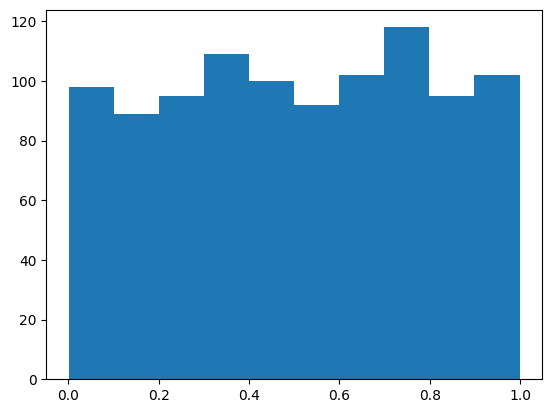

In [14]:
ELEMENT_NUM = 1000
arr = [random.random() for _ in range(ELEMENT_NUM)]

plt_hist_time, plt_hist_result = run_with_timer(lambda: plt.hist(arr, 10))
fast_hist_time, fast_hist_result = run_with_timer(lambda: fast_hist(arr, 10))

print(f"plt.hist result: {plt_hist_result}")
print(f"fast_hist result: {fast_hist_result}")
print()
print(f"plt.hist: {plt_hist_time}")
print(f"fast_hist: {fast_hist_time}")